# EDA Metabolic syndrom

Exploratory Data notebook for the dataset https://www.kaggle.com/datasets/antimoni/metabolic-syndrome/data

First we import the packages we will use for the exploration :
- matplotlib
- pandas
- seaborn

What we want to see : 
- If the dataset follows the society's general tendencies so that it can be compared properly
- Check the correlation between features

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from dataclasses import dataclass

df = pd.read_csv('Metabolic Syndrome.csv', sep = ',')

## Some basics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [4]:
df.describe(include='O').T

,count,unique,top,freq
Sex,2401,2,Female,1211
Marital,2193,5,Married,1192
Race,2401,6,White,933


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seqn,2401.0,67030.674302,2823.565114,62161.0,64591.000,67059.00,69495.000,71915.0
Age,2401.0,48.691795,17.632852,20.0,34.000,48.00,63.000,80.0
Income,2284.0,4005.253940,2954.032186,300.0,1600.000,2500.00,6200.000,9000.0
WaistCirc,2316.0,98.307254,16.252634,56.2,86.675,97.00,107.625,176.0
BMI,2375.0,28.702189,6.662242,13.4,24.000,27.70,32.100,68.7
Albuminuria,2401.0,0.154102,0.422780,0.0,0.000,0.00,0.000,2.0
UrAlbCr,2401.0,43.626131,258.272829,1.4,4.450,7.07,13.690,5928.0
UricAcid,2401.0,5.489046,1.439358,1.8,4.500,5.40,6.400,11.3
BloodGlucose,2401.0,108.247813,34.820657,39.0,92.000,99.00,110.000,382.0
HDL,2401.0,53.369429,15.185537,14.0,43.000,51.00,62.000,156.0


## Gender and Age repartition

We check the gender and age repartition respect to the norm repartition. For this part we do as if the dataset was French, since there are no available information on the origins of the dataset. Most probably the dataset is from the US, but even so the age repartition is similar between the two countries (https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/ and https://www.statista.com/statistics/464032/distribution-population-age-group-france/)

In [6]:
df = pd.read_csv('Metabolic Syndrome.csv', sep = ',')

df_sex_ages = df[["Age", "Sex"]]
df_male = df_sex_ages.loc[df_sex_ages.Sex=='Male']
df_female = df_sex_ages.loc[df_sex_ages.Sex=='Female']

ages_male = pd.get_dummies(pd.cut(df_male['Age'],
                           bins=(0,20,30,40,50,60,70,80,np.inf),
                           labels=['Under 20','21 to 30','31 to 40','41 to 50', '51 to 60', '61 to 70', '71 to 80', 'Over 81']))

ages_female = pd.get_dummies(pd.cut(df_female['Age'],
                           bins=(0,20,30,40,50,60,70,80,np.inf),
                           labels=['Under 20','21 to 30','31 to 40','41 to 50', '51 to 60', '61 to 70', '71 to 80', 'Over 81']))

dico_age_male = dict(zip(ages_male.columns, ages_male.value_counts()))
dico_age_female = dict(zip(ages_female.columns, ages_female.value_counts()))

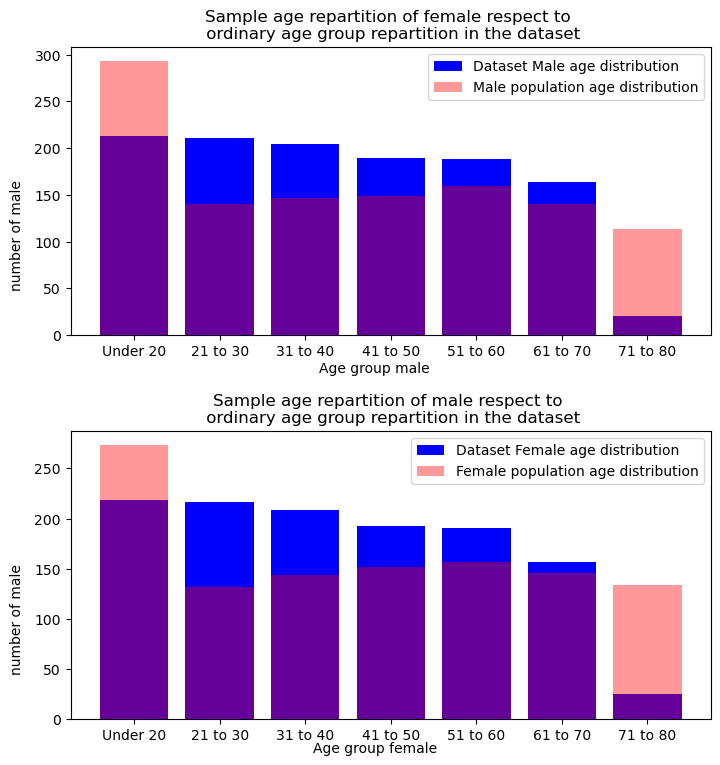

<Figure size 1600x900 with 0 Axes>

In [83]:
ctrl_distribution_male = [142, 68, 71, 72, 77, 68, 55]
ctrl_distribution_male = [i*2.0645558144130888138670069474839 for i in ctrl_distribution_male]
ctrl_distribution_female = [141, 68, 74, 78, 81, 75, 69]
ctrl_distribution_female = [i*1.9393589198996768975264360179271 for i in ctrl_distribution_female]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.bar(['Under 20','21 to 30','31 to 40','41 to 50', '51 to 60', '61 to 70', '71 to 80'], [val for key, val in dico_age_male.items()], color='b', label="Dataset Male age distribution")
ax1.bar(['Under 20','21 to 30','31 to 40','41 to 50', '51 to 60', '61 to 70', '71 to 80'], ctrl_distribution_male, color = 'r', alpha = 0.4, label = "Male population age distribution")

ax2.bar(['Under 20','21 to 30','31 to 40','41 to 50', '51 to 60', '61 to 70', '71 to 80'], [val for key, val in dico_age_female.items()], color = 'b', label = "Dataset Female age distribution")
ax2.bar(['Under 20','21 to 30','31 to 40','41 to 50', '51 to 60', '61 to 70', '71 to 80'], ctrl_distribution_female, color = 'r', alpha = 0.4, label = "Female population age distribution")

fig.text(0.6, 0.78, 'Age group male', ha='center', va='center')
fig.text(0.03, 0.95, 'number of male', rotation="vertical")

fig.text(0.60, -0.01, 'Age group female', ha='center', va='center')
fig.text(0.03, 0.15, 'number of male', rotation="vertical")

ax1.set_title('Sample age repartition of female respect to \n ordinary age group repartition in the dataset')
ax2.set_title('Sample age repartition of male respect to \n ordinary age group repartition in the dataset')

ax1.set_position([0.125, 0.85, 1, 0.6])
ax2.set_position([0.125, 0.05, 1, 0.6])

ax1.legend()
ax2.legend()


plt.figure(figsize=(16,9))
plt.show()

It appears there is quite a difference between the dataset age group repartition and the normal distribution of age group. It could be interesting to apply a coefficient to set each age group in the population distribution.

C:\Users\matte\AppData\Local\Temp\ipykernel_1660\711242269.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

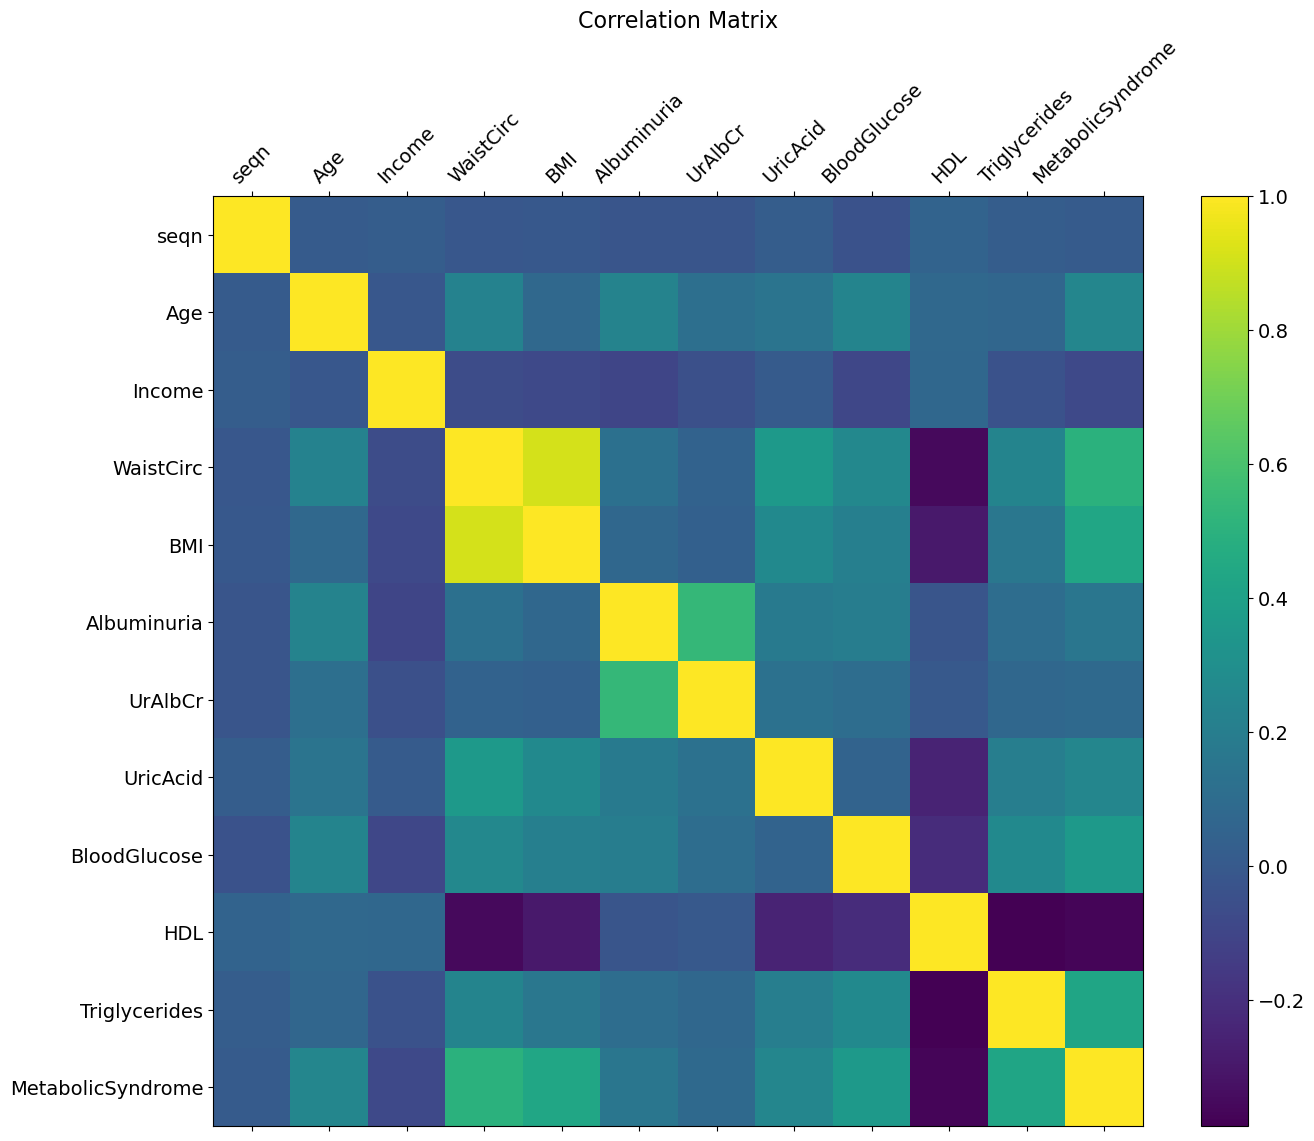

In [89]:
f = plt.figure(figsize=(15, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

The main caracteristic that seam linked to Metabolic syndrom are WaistCirc, BMI, Blood Glucose, Triglycerides. It is interesting to note that there is almost a 100% correlation between the WaitCirc and the BMI. There is also a high correlation between Albuminuria, UrAlbCr.